In [1]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target variable (0: malignant, 1: benign)

In [3]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [4]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train classifier
classifier = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)
classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [5]:
# Make predictions
y_pred = classifier.predict(X_test_scaled)

In [6]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=data.target_names)

In [7]:
# Print results
print(f"Accuracy: {accuracy:.4f}\n")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.9474

Confusion Matrix:
[[39  3]
 [ 3 69]]

Classification Report:
              precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        42
      benign       0.96      0.96      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



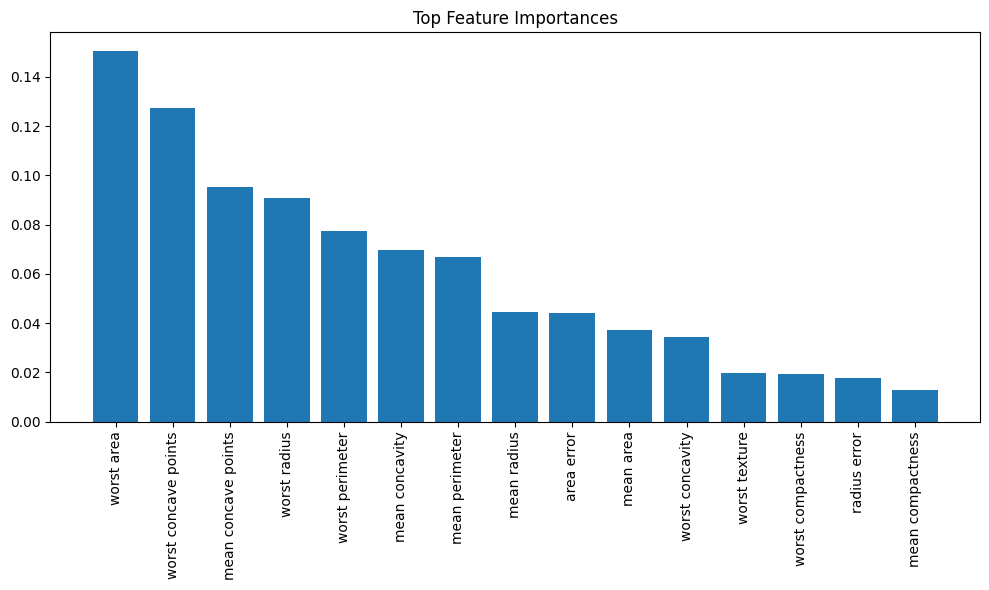

In [8]:
# Feature importance visualization
import matplotlib.pyplot as plt
import numpy as np

feature_importances = classifier.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
top_features = 15  # Show top 15 features

plt.figure(figsize=(10, 6))
plt.title("Top Feature Importances")
plt.bar(range(top_features), feature_importances[sorted_idx][:top_features])
plt.xticks(range(top_features), np.array(data.feature_names)[sorted_idx][:top_features], rotation=90)
plt.tight_layout()
plt.show()